In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [194]:
df = pd.read_csv('formatted_dataset.csv',index_col=0)

In [195]:
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,8,5,Animation and Multimedia Design,1,1,1,General commerce course,Other—11th Year of Schooling,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,6,1,Tourism,1,1,1,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1,5,Communication Design,1,1,1,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [196]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

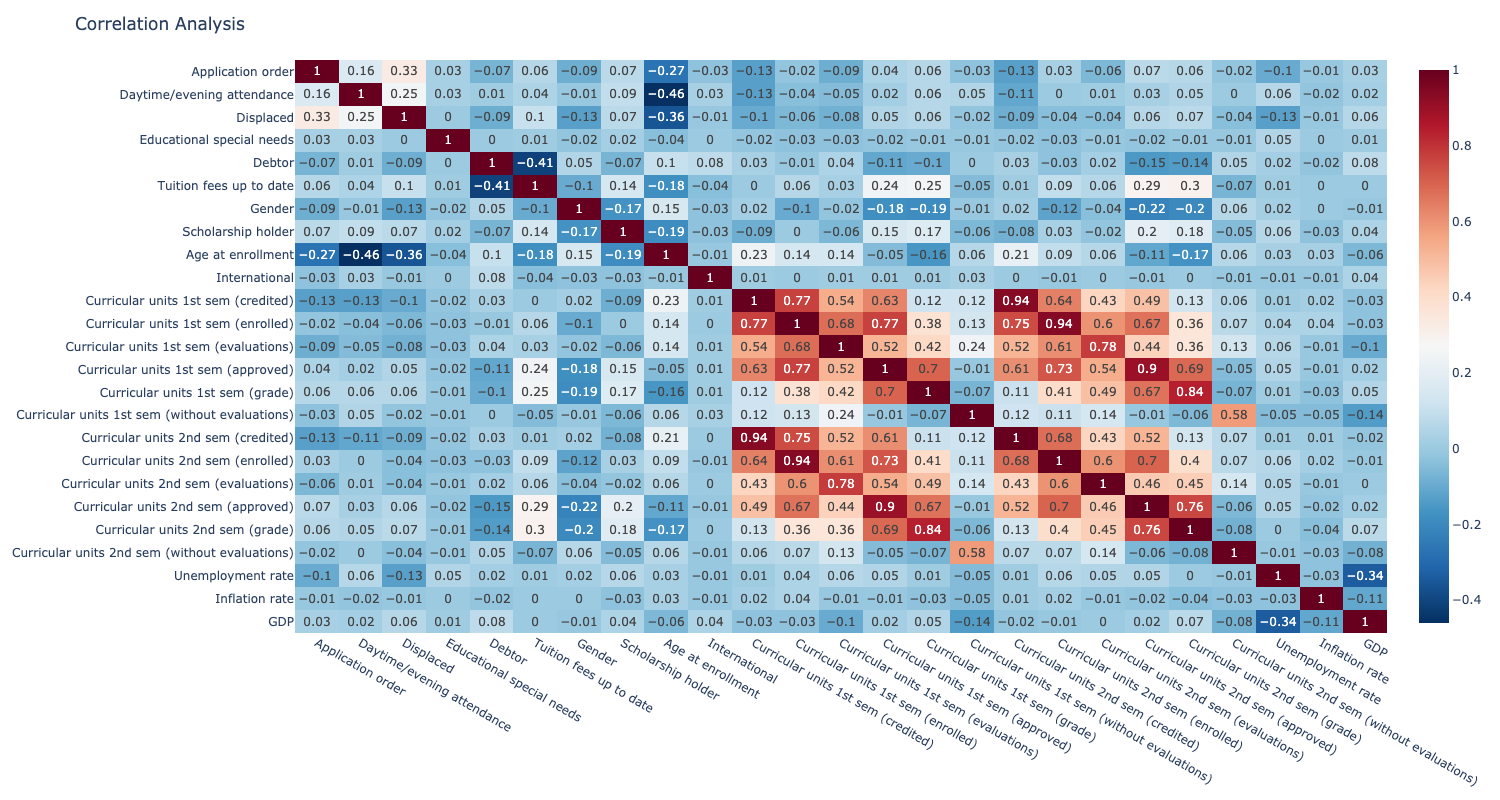

In [197]:
# correlational analysis
fig = px.imshow(continuous_data.corr().round(2), text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title = 'Correlation Analysis', height=800, width=1500)
fig.write_image('fig.png', engine='kaleido')
fig.show('png')

Looking at the boolean and continuous data, we can see that there is a high correlation between curricular units taken so we only need to include one of these in the model.

,Target
index,
Graduate,2209
Dropout,1421
Enrolled,794


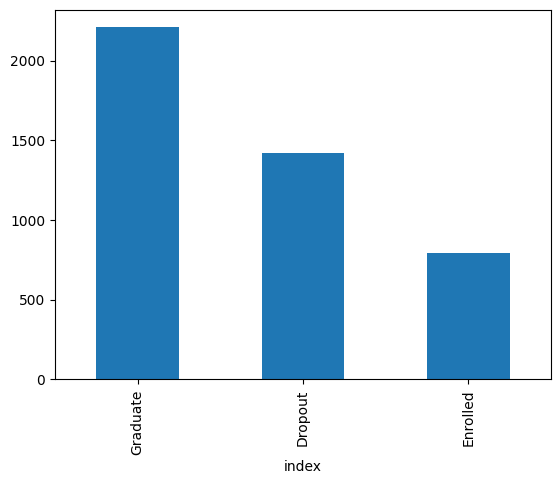

In [198]:
# TODO: relable x axis

# distributionof target variables
vis = df['Target'].value_counts().reset_index()
vis.set_index('index', inplace=True)
vis.plot(kind='bar', legend=None)
vis

In [199]:
def histogram(column, height):
    fig = px.histogram(df, y=column, color = 'Target',
                   width = 900, height = height, text_auto=True, 
                color_discrete_sequence=px.colors.qualitative.T10)
    fig.update_layout(title=column)
    fig.show()

In [200]:
def make_bar_graph(data,column,false_val='No',true_val='Yes'):
    vis=data[[column, 'Target']].value_counts().reset_index()
    N = 3
    ind = np.arange(N)  
    width = 0.25
    yvals = list(vis[vis[column]==1].sort_values(by='Target')[0])
    barf = plt.bar(ind, yvals, width, color = 'r') 
    nvals = list(vis[vis[column]==0].sort_values(by='Target')[0])
    barm = plt.bar(ind+width, nvals, width, color='g')
    plt.xlabel("Graduation Status") 
    plt.ylabel('Frequency') 
    plt.title(column) 

    plt.xticks(ind+width,['Dropout', 'Enrolled', 'Graduate']) 
    plt.legend( (barf, barm), (true_val, false_val) ) 
    plt.show() 

In [201]:
def create_boxplot(x, y):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [202]:
# Course
histogram('Course',600)

In [203]:
# Marital status
histogram('Marital status',300)

Text(0, 0.5, 'Probability')

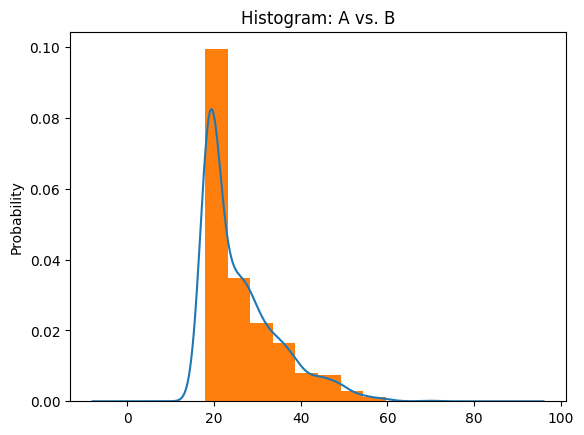

In [204]:
# Age at enrollment
x = df[df['Target']=='Dropout']['Age at enrollment']
fig, ax = plt.subplots()
x.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B') #want
x.plot.hist(density=True, ax=ax) #want
ax.set_ylabel('Probability')#want

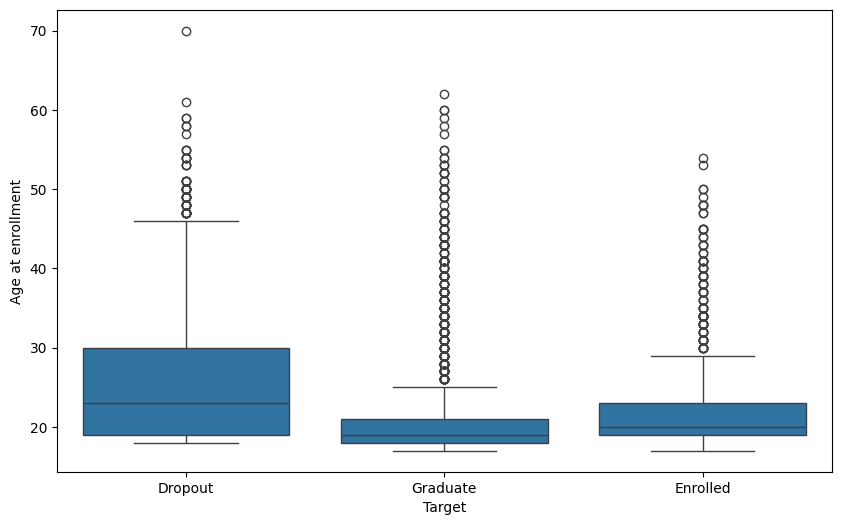

In [205]:
create_boxplot('Target','Age at enrollment')

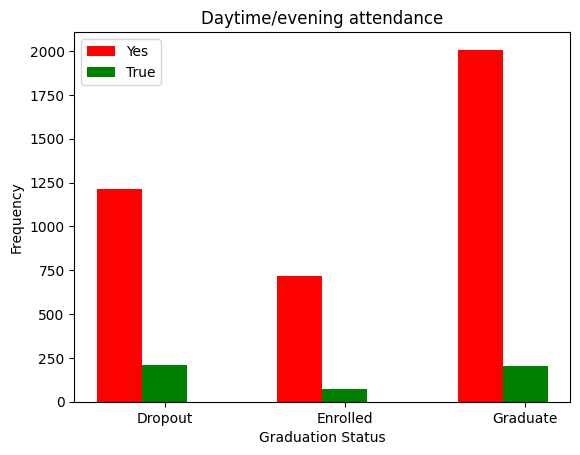

In [206]:
# Daytime/evening attendance
make_bar_graph(df,'Daytime/evening attendance',True)

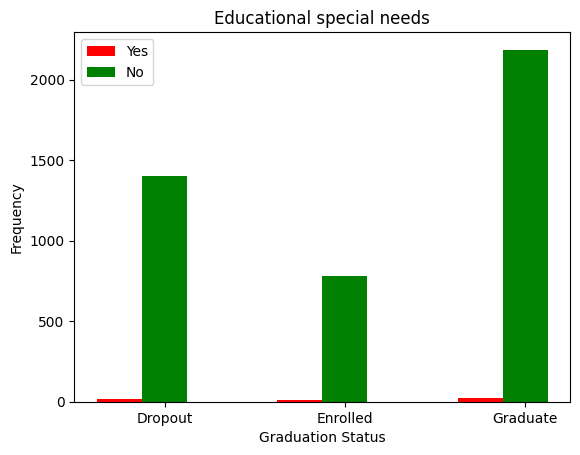

In [207]:
# educational special needs
make_bar_graph(df,'Educational special needs')

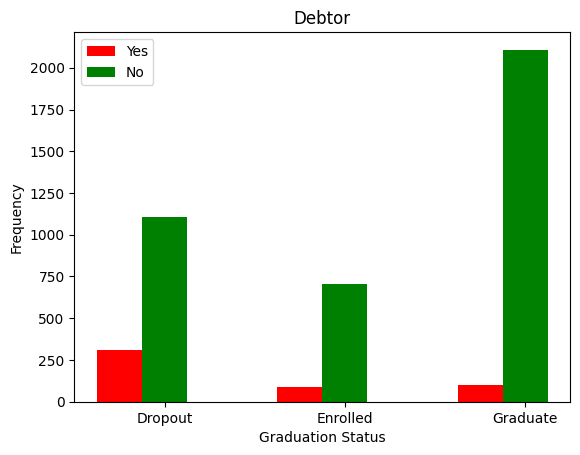

In [208]:
# debtor
make_bar_graph(df,'Debtor')

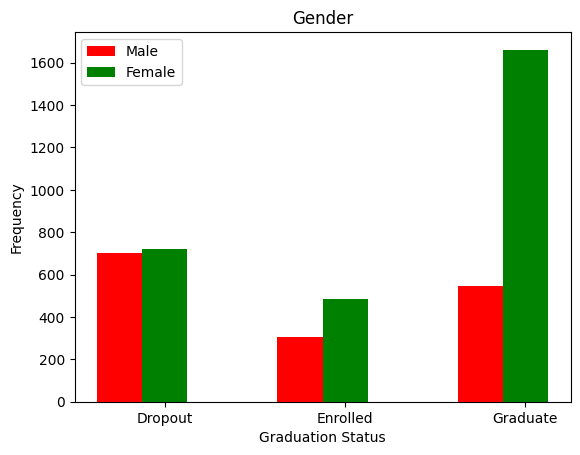

In [209]:
# gender
make_bar_graph(df,'Gender','Female','Male')

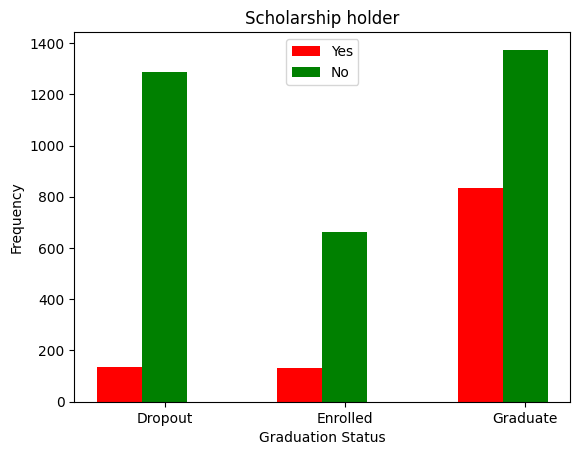

In [210]:
# Scholarship holder
make_bar_graph(df,'Scholarship holder')

In [211]:
 
# 'Application mode',
# 'Application order', 
# 'Previous qualification',
# 'Displaced', 
# 'Tuition fees up to date',
# 'Unemployment rate',
#        'Inflation rate', 
# 'GDP', 
# 'Target'

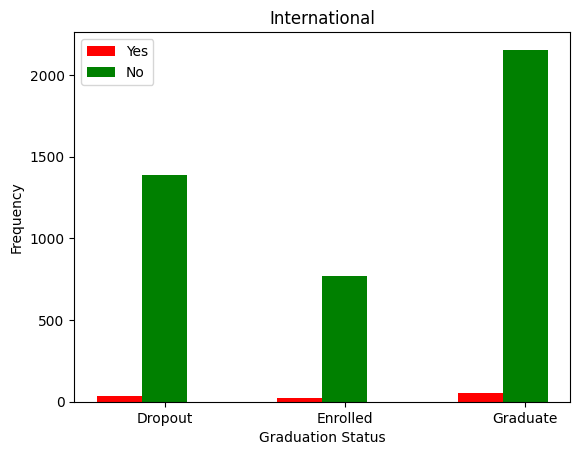

In [212]:
make_bar_graph(df,'International')

In [213]:
# Heat map showing correlation of features
continuous_data = df[['Application order',
       'Daytime/evening attendance', 
      'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]


In [214]:
# Mother's qualification
histogram("Mother's qualification",600)

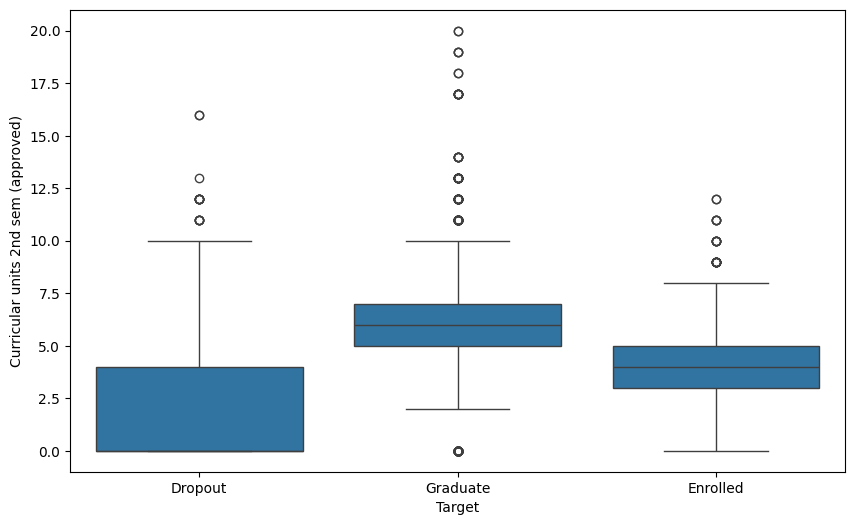

In [246]:
# Curricular units 2nd sem (grade)
create_boxplot('Target','Curricular units 2nd sem (approved)')

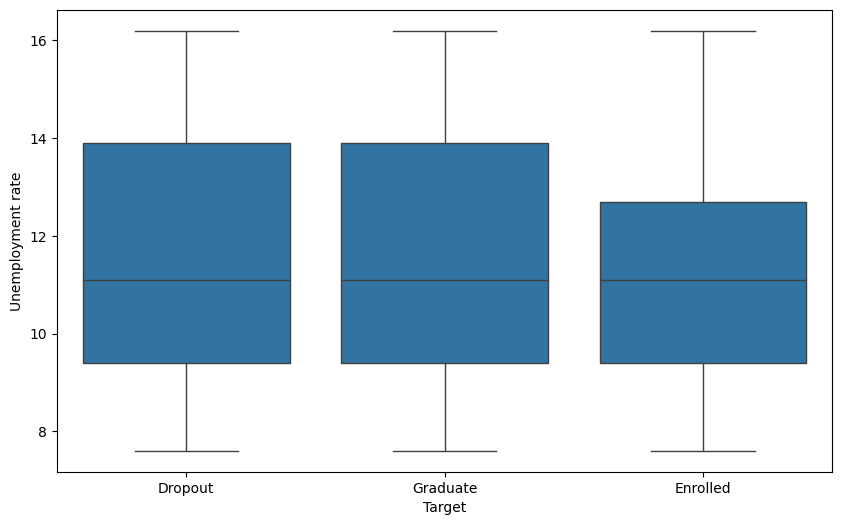

In [242]:
create_boxplot('Target','Unemployment rate')
# Unemplyment rate is unrelated to graduation rate

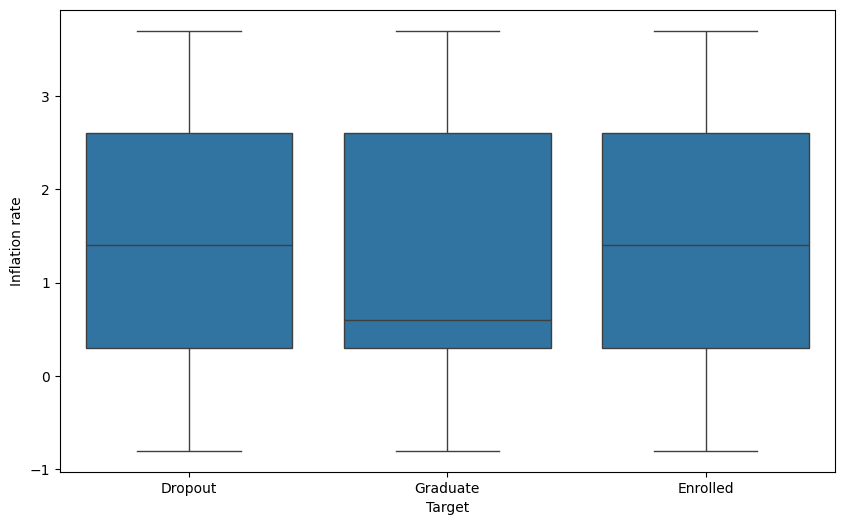

In [244]:
create_boxplot('Target','Inflation rate')
# Inflation rate is unrelated to graduation rate

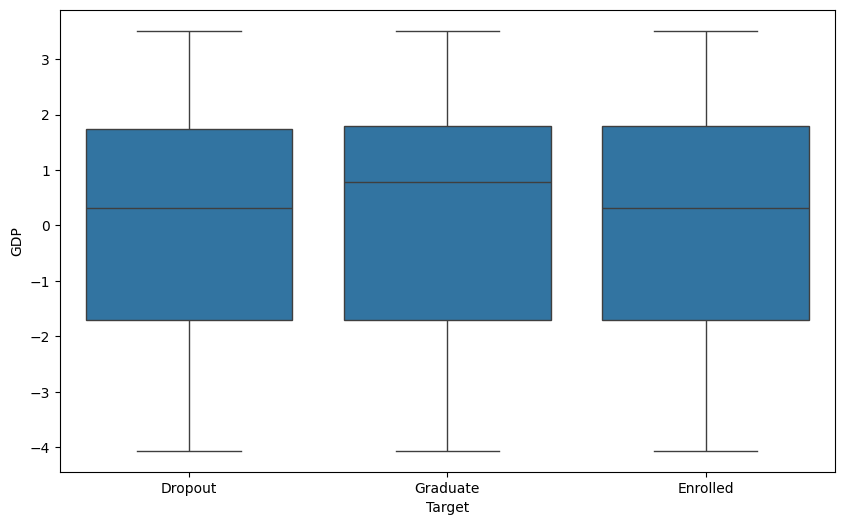

In [245]:
create_boxplot('Target','GDP')
# GDP is unrelated to graduation rate